In [45]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt5

from scipy.signal import find_peaks
from scipy.signal import argrelmin, argrelmax

import scipy.stats

import seaborn as sns
sns.set_style('whitegrid')

def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

#defino mi propia funcion de busqueda de minimos 

def minimos_locales(dfg , degree , smooth =  False):
    
    if smooth == False:
        t = np.array(dfg.t) 
        v = np.array(dfg.v) 
    elif smooth == True:
        t = smoothTriangle(np.array(dfg.t) ,  degree)
        v = smoothTriangle(np.array(dfg.v) ,  degree)

    dv_dt=(np.diff(v ) )/ (np.diff(t ) )

    a = dv_dt * np.roll(dv_dt , 1)

    tmins = np.argwhere(a < 0)



    return tmins

def filtro_peaks(peaks_ar , ancho_campana):
    peaks_ar_ =  peaks_ar.reshape((1,len(peaks_ar)))[0].tolist()
    #busca picos con distancia mayor a 260 entre ellos
    singular_peaks = np.argwhere(np.diff(peaks_ar_) > ancho_campana).reshape((1 , len(np.argwhere(np.diff(peaks_ar_) > ancho_campana))))
    
    return peaks_ar[singular_peaks]

%matplotlib inline

# bring in the data measured in the lab

In [46]:
frames = os.listdir('25nanoseg_6vreal')
len(frames)

10000

In [47]:
df = pd.DataFrame()

for frame in frames[:100]:
    frame_df = pd.read_csv(f'25nanoseg_6vreal/{frame}')
    
    df = pd.concat([df , frame_df])
    
signal = df.v.reset_index(drop = True)
v = np.array(df.v)

plt.figure(figsize = (15,4))
plt.plot(signal)
plt.ylabel("Voltaje")


# locating peaks in the signal 

In [63]:
peaks_ar= minimos_locales(df , 50 , smooth = True) #locates all peaks
singular_peaks_ar=  filtro_peaks(peaks_ar ,150) #filters peaks

#plot signal with peaks
plt.figure(figsize = (15,4))
plt.plot(signal)
plt.scatter(singular_peaks_ar[0] , v[singular_peaks_ar[0]] , color = 'red' , alpha = 0.7, label = 'Picos detectados')
plt.ylabel("Voltaje")
plt.legend

C:\Users\lucas\AppData\Local\Temp/ipykernel_14592/1386791402.py:39: RuntimeWarning: invalid value encountered in true_divide
  dv_dt=(np.diff(v ) )/ (np.diff(t ) )


array([[   112],
       [   274],
       [   599],
       [   882],
       [  1192],
       [  1477],
       [  1807],
       [  2075],
       [  2694],
       [  2849],
       [  3260],
       [  3837],
       [  4182],
       [  4553],
       [  5046],
       [  5204],
       [  5408],
       [  5723],
       [  5930],
       [  6369],
       [  6628],
       [  6810],
       [  8778],
       [  9258],
       [  9416],
       [ 10239],
       [ 10617],
       [ 10986],
       [ 11212],
       [ 11486],
       [ 11651],
       [ 12555],
       [ 13112],
       [ 13265],
       [ 13588],
       [ 13922],
       [ 14475],
       [ 15387],
       [ 15616],
       [ 15852],
       [ 16265],
       [ 16553],
       [ 16846],
       [ 17816],
       [ 18014],
       [ 18235],
       [ 18392],
       [ 18899],
       [ 19359],
       [ 20095],
       [ 20482],
       [ 20909],
       [ 21446],
       [ 21717],
       [ 21892],
       [ 22195],
       [ 23112],
       [ 23281],
       [ 23857

# plot distribution of all peaks

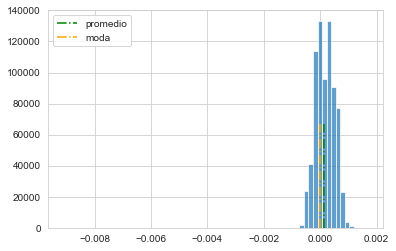

In [25]:
df_singular_peaks = pd.Series(v[singular_peaks_ar[0]].reshape(1, len(v[singular_peaks_ar[0]]))[0]) #creates a data series of located peaks


std  = np.std(signal)
mean = np.mean(signal)
mode = scipy.stats.mode(signal)[0][0]

umbral_v = max(signal) + mean/10000 # consideramos que los picos positivos son ruido ---> lo tomamos de umbral

plt.figure()

n , bins , patches = plt.hist(v[singular_peaks_ar[0]] , bins = len(df_singular_peaks.unique()), alpha = 0.7);

plt.vlines(mean , 0 , np.max(n)/2, color= 'g', linestyle = '-.', label = 'promedio')
plt.vlines(mode , 0 , np.max(n)/2, color= 'orange', linestyle = '-.', label= 'moda')

#plt.vlines(umbral_v , 0 , np.max(n)/2 , color = 'red' , linestyle = '-.')
#plt.vlines(-umbral_v , 0 , np.max(n)/2, color = 'red', linestyle = '-.')
plt.legend()






## distribution of positive peaks

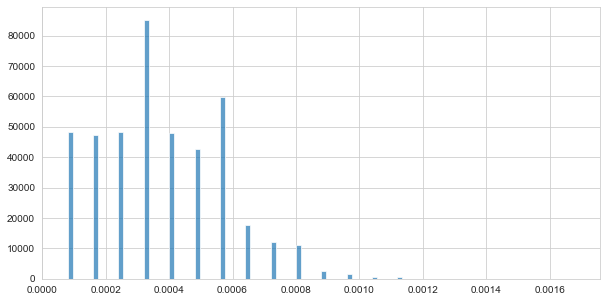

In [23]:
singular_v = v[singular_peaks_ar[0]]
ruido = df_singular_peaks[df_singular_peaks>mode]

f , ax = plt.subplots(nrows = 1, ncols=1 , figsize = (10 , 5))
ax.hist(ruido, bins = 100 ,  alpha = 0.7);

## distribution of negative peaks

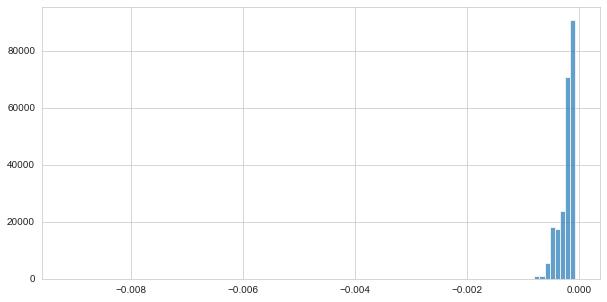

In [24]:
mix = df_singular_peaks[df_singular_peaks<mode]

f , ax = plt.subplots(nrows = 1, ncols=1 , figsize = (10 , 5))
ax.hist(mix , bins = 100  , alpha = 0.7);

we assume that the distribution of white noise must be symmetric; therefore, asymmetries in the distribution are considered photon counts.

## plotting of positive and negative sections of the distribution

overlapping them to study where the distribution for photon count peaks ends and white noise begins.

In [26]:
nmix, binsmix , patches1 = plt.hist(mix , bins = len(mix.unique())  , alpha = 0.7, label = 'picos negativos')

nruido, binsruido , patches2 = plt.hist( - ruido + mode, bins = len(ruido.unique())   , color = 'grey' , alpha = 0.5 , label = 'picos positivos')
plt.legend()

padding =len(nmix) - len(nruido)



pad = np.zeros(padding )
n_ruido_pad = np.concatenate(( pad , nruido ))
len(n_ruido_pad)


plt.figure()
plt.bar(binsmix[:-1], nmix - n_ruido_pad, align='edge', width=0.85*(binsmix[1] - binsmix[0]) )

228640
425321


In [29]:

plt.figure()
plt.bar(binsmix[:-1], nmix - n_ruido_pad, align='edge', width=0.85*(binsmix[1] - binsmix[0]) , alpha = 0.3, color = 'red', label = 'resta de densidades')
plt.hist(mix , bins = len(mix.unique()) , alpha = 0.5 , label = 'picos negativos')
plt.hist( - ruido , bins = len(ruido.unique())  , alpha = 0.4 , label = 'picos positivos');
plt.legend()